In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carichiamo il file Excel per vedere il contenuto
file_path = '/Users/cami/Documents/GitHub/pyesm_thesis/tesi_camilla/casi_MarioU/Res_dataframes.xlsx'
excel_data = pd.ExcelFile(file_path)

df = pd.read_excel(excel_data, sheet_name='Sheet1')

df_clean = df.copy()
df_clean = df_clean.drop([0, 1])     # Rimuoviamo la riga delle città e degli utenti
df_clean.set_index('house', inplace=True)

In [36]:
# Selezioniamo solo i dati per EE e NG
data_electricity = df_clean.loc['Q_EE']
data_gas = df_clean.loc['Q_NG']

# Rinominiamo le colonne per chiarezza
data_electricity.columns = ['Electricity']
data_gas.columns = ['Gas']

# Creiamo un DataFrame congiunto per il grafico
data_combined = pd.concat([data_electricity, data_gas], axis=1)
data_combined.reset_index(inplace=True)
data_combined.columns = ['User', 'Electricity', 'Gas']

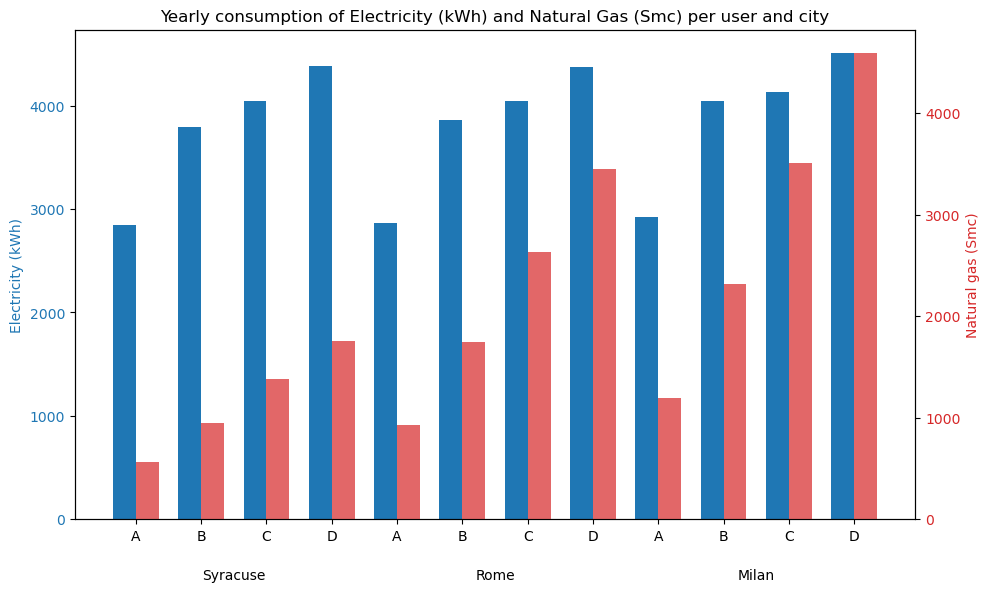

In [40]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)
data_combined['User'] = names
# Definiamo la posizione delle barre
x = np.arange(len(data_combined['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico per l'elettricità (asse sinistro)
rects1 = ax1.bar(x - width/2, data_combined['Electricity'], width, label='Electricity', color='#1f77b4')
ax1.set_ylabel('Electricity (kWh)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Asse destro per il gas
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, data_combined['Gas'], width, label='Gas', color='#d62728', alpha=0.7)
ax2.set_ylabel('Natural gas (Smc)', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(data_combined['User'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.1, city, ha='center', va='top', transform=ax1.get_xaxis_transform())


# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Smc) per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()


In [23]:
# Selezioniamo solo i dati per opex e capex
opex = df_clean.loc['opex']
capex = df_clean.loc['capex']

# Rinominiamo le colonne per chiarezza
opex.columns = ['opex']
capex.columns = ['capex']

# Creiamo un DataFrame congiunto per il grafico
data_combined = pd.concat([opex, capex], axis=1)
data_combined.reset_index(inplace=True)
data_combined.columns = ['User', 'Opex', 'Capex']

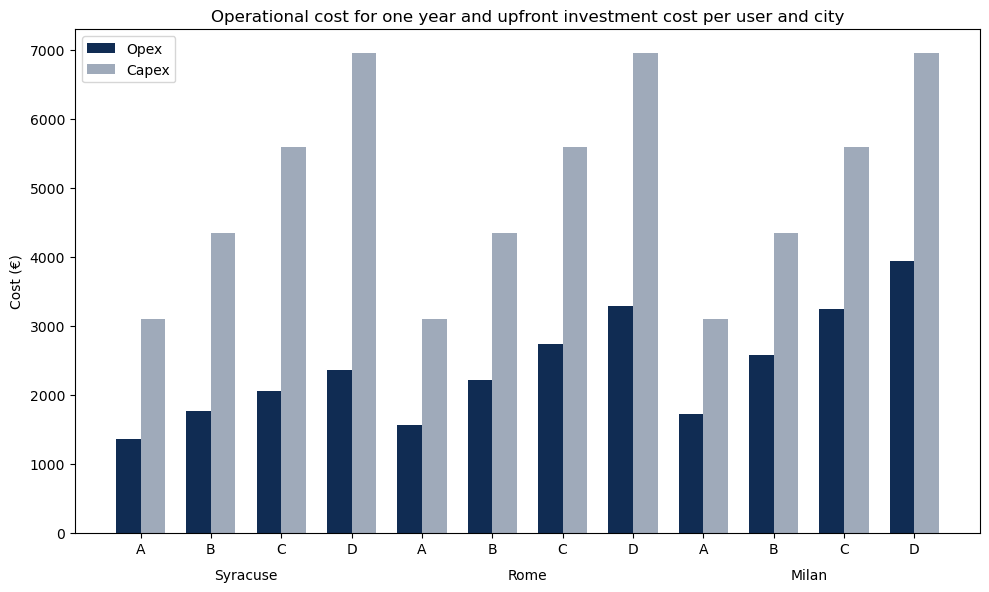

In [34]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)
data_combined['User'] = names

# Definiamo la posizione delle barre
x = np.arange(len(data_combined['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre per opex e capex
rects1 = ax.bar(x - width/2, data_combined['Opex'], width, label='Opex', color='#102C53')
rects2 = ax.bar(x + width/2, data_combined['Capex'], width, label='Capex', color='#102C5366')

# Aggiungiamo le etichette degli utenti e l'asse y in €
ax.set_ylabel('Cost (€)')
ax.set_xticks(x)
ax.set_xticklabels(data_combined['User'])


# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())

ax.legend()
# Titolo e layout
plt.title('Operational cost for one year and upfront investment cost per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()